# ESCO Skills Hierarchy Investigation

This notebook investigates the ESCO skills dataset structure, focusing on:
1. Skills Collections (digital, green, language, research, transversal, digComp)
2. Skills Hierarchy
3. Broader Relations in the Skill Pillar

## Goal: Understand how ESCO organizes skills hierarchically


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Define data path
DATA_PATH = Path('/Users/egesualp/Documents/lmu_repos/skills4cpp/data/esco_datasets')


## 1. Load Main Skills Data


In [ ]:
# Load the main skills file
skills_df = pd.read_csv(DATA_PATH / 'skills_en.csv')
print(f"Skills DataFrame shape: {skills_df.shape}")
print(f"\nColumns: {skills_df.columns.tolist()}")
skills_df.head()


Skills DataFrame shape: (13939, 13)

Columns: ['conceptType', 'conceptUri', 'skillType', 'reuseLevel', 'preferredLabel', 'altLabels', 'hiddenLabels', 'status', 'modifiedDate', 'scopeNote', 'definition', 'inScheme', 'description']


,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0005c151-5b5a-4a66-8aac-60e734beb1ab,skill/competence,sector-specific,manage musical staff,manage staff of music\ncoordinate duties of musical staff\nmanage music staff\ndirect musical staff,NaN,released,2023-11-30T15:53:37.136Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/skills,\nhttp://data.europa.eu/esco/concept-scheme/mem...","Assign and manage staff tasks in areas such as scoring, arranging, copying music and vocal coach..."
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00064735-8fad-454b-90c7-ed858cc993f2,skill/competence,occupation-specific,supervise correctional procedures,oversee prison procedures\nmanage correctional procedures\nmonitor correctional procedures\nmana...,NaN,released,2023-11-30T15:04:00.689Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/member-skills,\nhttp://data.europa.eu/esco/concept-sch...","Supervise the operations of a correctional facility or other correctional procedures, ensuring t..."
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000709ed-2be5-4193-b056-45a97698d828,skill/competence,sector-specific,apply anti-oppressive practices,apply non-oppressive practices\napply an anti-oppressive practice\nmake use of anti-oppressive p...,NaN,released,2023-11-28T10:45:53.54Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/skills,\nhttp://data.europa.eu/esco/concept-scheme/mem...","Identify oppression in societies, economies, cultures, and groups, acting as a professional in a..."
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0007bdc2-dd15-4824-b7d6-416522c46f35,skill/competence,sector-specific,control compliance of railway vehicles regulations,monitoring of compliance with railway vehicles regulations\nmonitoring of compliance with rollin...,NaN,released,2023-11-30T16:29:18.273Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/skills,\nhttp://data.europa.eu/esco/concept-scheme/mem...","Inspect rolling stock, components and systems to ensure compliance with standards and specificat..."
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00090cc1-1f27-439e-a4e0-19a87a501bfc,skill/competence,cross-sector,identify available services,establish available services\ndetermine rehabilitation services\nanalyse rehabilitation services...,NaN,released,2023-11-28T10:38:49.206Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/member-skills,\nhttp://data.europa.eu/esco/concept-sch...",Identify the different services available for an offender during probation in order to help in t...


In [ ]:
skills_df.reuseLevel.unique()

array(['sector-specific', 'occupation-specific', 'cross-sector',
       'transversal', nan], dtype=object)

## 2. Load and Investigate Skills Hierarchy


In [ ]:
# Load skills hierarchy
skills_hierarchy = pd.read_csv(DATA_PATH / 'skillsHierarchy_en.csv')
print(f"Skills Hierarchy shape: {skills_hierarchy.shape}")
print(f"\nColumns: {skills_hierarchy.columns.tolist()}")
skills_hierarchy.head(10)


Skills Hierarchy shape: (640, 14)

Columns: ['Level 0 URI', 'Level 0 preferred term', 'Level 1 URI', 'Level 1 preferred term', 'Level 2 URI', 'Level 2 preferred term', 'Level 3 URI', 'Level 3 preferred term', 'Description', 'Scope note', 'Level 0 code', 'Level 1 code', 'Level 2 code', 'Level 3 code']


,Level 0 URI,Level 0 preferred term,Level 1 URI,Level 1 preferred term,Level 2 URI,Level 2 preferred term,Level 3 URI,Level 3 preferred term,Description,Scope note,Level 0 code,Level 1 code,Level 2 code,Level 3 code
0,http://data.europa.eu/esco/skill/e35a5936-091d-4e87-bafe-f264e55bd656,language skills and knowledge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,NaN,NaN,NaN
1,http://data.europa.eu/esco/skill/e35a5936-091d-4e87-bafe-f264e55bd656,language skills and knowledge,http://data.europa.eu/esco/skill/43f425aa-f45d-4bb4-a200-6f82fa211b66,languages,NaN,NaN,NaN,NaN,"Ability to communicate through reading, writing, speaking and listening in the mother tongue and...",NaN,L,L1,NaN,NaN
2,http://data.europa.eu/esco/skill/e35a5936-091d-4e87-bafe-f264e55bd656,language skills and knowledge,http://data.europa.eu/esco/skill/e434e71a-f068-44ed-8059-d1af9eb592d7,classical languages,NaN,NaN,NaN,NaN,"All dead languages, no longer actively used, originating from various periods in history, such a...","Excludes:\n- all languages that are actively used as a mother tongue or lingua franca\n\nLatin,...",L,L2,NaN,NaN
3,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN
4,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,NaN,NaN,NaN,NaN,"Sorting, arranging, moving, transforming, fabricating and cleaning goods and materials by hand o...",Excludes:\n- Specific skills involving interaction with people,S,S6,NaN,NaN
5,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,http://data.europa.eu/esco/skill/15dfca7a-5dde-4199-bad3-c00600387258,handling and disposing of waste and hazardous materials,NaN,NaN,"Collecting, storing and disposing of unwanted materials or hazardous, according to established w...",NaN,S,S6,S6.13,NaN
6,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,http://data.europa.eu/esco/skill/15dfca7a-5dde-4199-bad3-c00600387258,handling and disposing of waste and hazardous materials,http://data.europa.eu/esco/skill/61d1dab2-6007-4b7c-9380-cd88207fa30f,disposing of non-hazardous waste or debris,Collecting and disposing of unwanted non-hazardous materials according to established waste mana...,Examples:\n- Handle fish harvesting waste \n- Collect domestic waste,S,S6,S6.13,S6.13.2
7,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,http://data.europa.eu/esco/skill/15dfca7a-5dde-4199-bad3-c00600387258,handling and disposing of waste and hazardous materials,http://data.europa.eu/esco/skill/8bde58aa-9d5b-422b-801c-ff9186dd648e,handling and disposing of hazardous materials,"Handling, collecting, storing and disposing of materials that pose substantial threats to public...",Hazardous waste is defined in accordance with the latest EU guidance on the classification of wa...,S,S6,S6.13,S6.13.1
8,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,http://data.europa.eu/esco/skill/15dfca7a-5dde-4199-bad3-c00600387258,handling and disposing of waste and hazardous materials,http://data.europa.eu/esco/skill/f8c676de-c871-424f-9a65-77059d07910a,handling and disposing of waste and hazardous materials,"Collecting, storing and disposing of unwanted materials or hazardous, according to established w...",NaN,S,S6,S6.13,S6.13.0
9,http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9,skills,http://data.europa.eu/esco/skill/03e0b95b-67d1-457a-b3f7-06c407cf6bec,handling and moving,http://data.europa.eu/esco/skill/1cc5ff0

In [ ]:
# Investigate the structure
print("Unique values in each column:")
for col in skills_hierarchy.columns:
    print(f"\n{col}: {skills_hierarchy[col].nunique()} unique values")
    if skills_hierarchy[col].nunique() < 20:
        print(f"  Values: {skills_hierarchy[col].unique()}")


Unique values in each column:

Level 0 URI: 4 unique values
  Values: ['http://data.europa.eu/esco/skill/e35a5936-091d-4e87-bafe-f264e55bd656'
 'http://data.europa.eu/esco/skill/335228d2-297d-4e0e-a6ee-bc6a8dc110d9'
 'http://data.europa.eu/esco/skill/04a13491-b58c-4d33-8b59-8fad0d55fe9e'
 'http://data.europa.eu/esco/skill/c46fcb45-5c14-4ffa-abed-5a43f104bb22']

Level 0 preferred term: 4 unique values
  Values: ['language skills and knowledge' 'skills'
 'transversal skills and competences' 'knowledge']

Level 1 URI: 28 unique values

Level 1 preferred term: 28 unique values

Level 2 URI: 156 unique values

Level 2 preferred term: 156 unique values

Level 3 URI: 452 unique values

Level 3 preferred term: 452 unique values

Description: 425 unique values

Scope note: 281 unique values

Level 0 code: 4 unique values
  Values: ['L' 'S' 'T' 'K']

Level 1 code: 28 unique values

Level 2 code: 156 unique values

Level 3 code: 452 unique values


## 3. Load Skill Groups


In [ ]:
# Load skill groups
skill_groups = pd.read_csv(DATA_PATH / 'skillGroups_en.csv')
print(f"Skill Groups shape: {skill_groups.shape}")
print(f"\nColumns: {skill_groups.columns.tolist()}")
skill_groups.head()


Skill Groups shape: (640, 11)

Columns: ['conceptType', 'conceptUri', 'preferredLabel', 'altLabels', 'hiddenLabels', 'status', 'modifiedDate', 'scopeNote', 'inScheme', 'description', 'code']


,conceptType,conceptUri,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,inScheme,description,code
0,SkillGroup,http://data.europa.eu/esco/isced-f/00,generic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/isced-f\nhttp://data.europa.eu/esco/concept-scheme/ski...,Generic programmes and qualifications are those providing fundamental and personal skills educat...,00
1,SkillGroup,http://data.europa.eu/esco/isced-f/000,generic programmes and qualifications not further defined,NaN,NaN,released,2023-07-13T15:16:44.968Z,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/skil...,NaN,000
2,SkillGroup,http://data.europa.eu/esco/isced-f/0000,generic programmes and qualifications not further defined,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/isce...,NaN,0000
3,SkillGroup,http://data.europa.eu/esco/isced-f/001,basic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/skil...,NaN,001
4,SkillGroup,http://data.europa.eu/esco/isced-f/0011,basic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/isced-f\nhttp://data.europa.eu/esco/concept-scheme/ski...,Basic programmes and qualifications are designed to provide participants with fundamental skills...,0011


In [ ]:
# View all skill groups
print(f"Total number of skill groups: {len(skill_groups)}")
skill_groups


Total number of skill groups: 640


,conceptType,conceptUri,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,inScheme,description,code
0,SkillGroup,http://data.europa.eu/esco/isced-f/00,generic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/isced-f\nhttp://data.europa.eu/esco/concept-scheme/ski...,Generic programmes and qualifications are those providing fundamental and personal skills educat...,00
1,SkillGroup,http://data.europa.eu/esco/isced-f/000,generic programmes and qualifications not further defined,NaN,NaN,released,2023-07-13T15:16:44.968Z,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/skil...,NaN,000
2,SkillGroup,http://data.europa.eu/esco/isced-f/0000,generic programmes and qualifications not further defined,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/isce...,NaN,0000
3,SkillGroup,http://data.europa.eu/esco/isced-f/001,basic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/skil...,NaN,001
4,SkillGroup,http://data.europa.eu/esco/isced-f/0011,basic programmes and qualifications,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/isced-f\nhttp://data.europa.eu/esco/concept-scheme/ski...,Basic programmes and qualifications are designed to provide participants with fundamental skills...,0011
...,...,...,...,...,...,...,...,...,...,...,...
635,SkillGroup,http://data.europa.eu/esco/skill/fbb861f7-2386-4d17-84f7-6e340a8e6cd9,providing personal care,personal care,NaN,released,NaN,"Excludes:\n- Administration of medical treatments and therapies, therapeutic massage",http://data.europa.eu/esco/concept-scheme/skills-hierarchy\nhttp://data.europa.eu/esco/concept-s...,Responding to the daily and occasional personal care needs of people.,S3.6.0
636,SkillGroup,http://data.europa.eu/esco/skill/fe317a4c-e4e0-45ee-8b0d-204a68014f9e,protecting and enforcing,NaN,NaN,released,NaN,NaN,http://data.europa.eu/esco/concept-scheme/skills-hierarchy\nhttp://data.europa.eu/esco/concept-s...,"Responding to public and personal safety and security needs and ensuring compliance to rules, st...",S3.3.0
637,SkillGroup,http://data.europa.eu/esco/skill/fe5eabaa-63f6-4c44-b405-fc3ded8d56cb,leading others,demonstrating leadership,leadership,released,2021-08-30T16:33:15.592Z,NaN,http://data.europa.eu/esco/concept-scheme/skills\nhttp://data.europa.eu/esco/concept-scheme/skil...,"Guide, direct and motivate others.",T4.4
638,SkillGroup,http://data.europa.eu/esco/skill/ff565308-8f29-4f1d-a342-9a29bd8b7446,handling and moving,handling goods or animals,NaN,released,NaN,Excludes:\n- Specific skills involving interaction with people,http://data.europa.eu/esco/concept-scheme/skills-hierarchy\nhttp://data.europa.eu/esco/concept-s...,"Sorting, arranging, moving, transforming, fabricating and cleaning goods and materials by hand o...",S6.0


## 4. Load Broader Relations for Skill Pillar


In [ ]:
# Load broader relations
broader_relations = pd.read_csv(DATA_PATH / 'broaderRelationsSkillPillar_en.csv')
print(f"Broader Relations shape: {broader_relations.shape}")
print(f"\nColumns: {broader_relations.columns.tolist()}")
broader_relations.head(10)


Broader Relations shape: (20822, 4)

Columns: ['conceptType', 'conceptUri', 'broaderType', 'broaderUri']


,conceptType,conceptUri,broaderType,broaderUri
0,SkillGroup,http://data.europa.eu/esco/isced-f/00,SkillGroup,http://data.europa.eu/esco/skill/c46fcb45-5c14-4ffa-abed-5a43f104bb22
1,SkillGroup,http://data.europa.eu/esco/isced-f/000,SkillGroup,http://data.europa.eu/esco/isced-f/00
2,SkillGroup,http://data.europa.eu/esco/isced-f/0000,SkillGroup,http://data.europa.eu/esco/isced-f/000
3,SkillGroup,http://data.europa.eu/esco/isced-f/001,SkillGroup,http://data.europa.eu/esco/isced-f/00
4,SkillGroup,http://data.europa.eu/esco/isced-f/0011,SkillGroup,http://data.europa.eu/esco/isced-f/001
5,SkillGroup,http://data.europa.eu/esco/isced-f/002,SkillGroup,http://data.europa.eu/esco/isced-f/00
6,SkillGroup,http://data.europa.eu/esco/isced-f/0021,SkillGroup,http://data.europa.eu/esco/isced-f/002
7,SkillGroup,http://data.europa.eu/esco/isced-f/003,SkillGroup,http://data.europa.eu/esco/isced-f/00
8,SkillGroup,http://data.europa.eu/esco/isced-f/0031,SkillGroup,http://data.europa.eu/esco/isced-f/003
9,SkillGroup,http://data.europa.eu/esco/isced-f/009,SkillGroup,http://data.europa.eu/esco/isced-f/00


## 5. Investigate All Collections


In [ ]:
# Define collection files
collections = {
    'digital': 'digitalSkillsCollection_en.csv',
    'green': 'greenSkillsCollection_en.csv',
    'language': 'languageSkillsCollection_en.csv',
    'research': 'researchSkillsCollection_en.csv',
    'transversal': 'transversalSkillsCollection_en.csv',
    'digComp': 'digCompSkillsCollection_en.csv'
}

# Load all collections
collection_dfs = {}
for name, filename in collections.items():
    df = pd.read_csv(DATA_PATH / filename)
    collection_dfs[name] = df
    print(f"\n{name.upper()} Collection:")
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {df.columns.tolist()}")



DIGITAL Collection:
  Shape: (1284, 10)
  Columns: ['conceptType', 'conceptUri', 'preferredLabel', 'status', 'skillType', 'reuseLevel', 'altLabels', 'description', 'broaderConceptUri', 'broaderConceptPT']

GREEN Collection:
  Shape: (591, 10)
  Columns: ['conceptType', 'conceptUri', 'preferredLabel', 'status', 'skillType', 'reuseLevel', 'altLabels', 'description', 'broaderConceptUri', 'broaderConceptPT']

LANGUAGE Collection:
  Shape: (359, 10)
  Columns: ['conceptType', 'conceptUri', 'skillType', 'reuseLevel', 'preferredLabel', 'status', 'altLabels', 'description', 'broaderConceptUri', 'broaderConceptPT']

RESEARCH Collection:
  Shape: (40, 10)
  Columns: ['conceptType', 'conceptUri', 'preferredLabel', 'status', 'skillType', 'reuseLevel', 'altLabels', 'description', 'broaderConceptUri', 'broaderConceptPT']

TRANSVERSAL Collection:
  Shape: (95, 10)
  Columns: ['conceptType', 'conceptUri', 'skillType', 'reuseLevel', 'preferredLabel', 'status', 'altLabels', 'description', 'broaderConce

In [ ]:
collections['language']

'languageSkillsCollection_en.csv'


Collection Sizes Summary:
             Number of Skills
digital                  1284
green                     591
language                  359
transversal                95
research                   40
digComp                    25


<Figure size 1000x600 with 0 Axes>

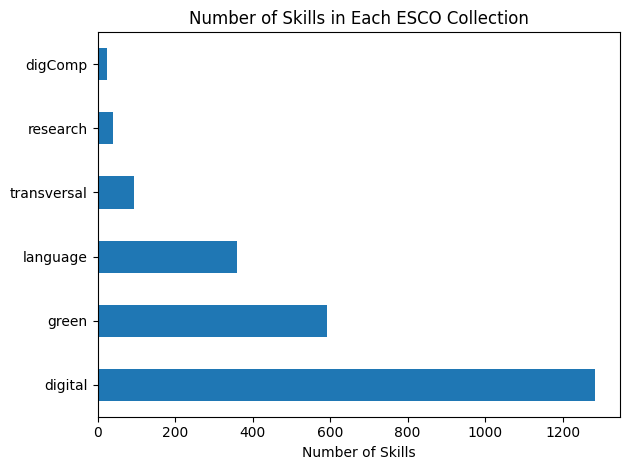

In [ ]:
# Compare collection sizes
collection_sizes = {name: len(df) for name, df in collection_dfs.items()}
collection_sizes_df = pd.DataFrame.from_dict(collection_sizes, orient='index', columns=['Number of Skills'])
collection_sizes_df = collection_sizes_df.sort_values('Number of Skills', ascending=False)

print("\nCollection Sizes Summary:")
print(collection_sizes_df)

# Visualize
plt.figure(figsize=(10, 6))
collection_sizes_df.plot(kind='barh', legend=False)
plt.xlabel('Number of Skills')
plt.title('Number of Skills in Each ESCO Collection')
plt.tight_layout()
plt.show()


In [ ]:
# Sample from each collection
for name, df in collection_dfs.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()} Collection - Sample (first 5 rows):")
    print(f"{'='*60}")
    display(df.head())



DIGITAL Collection - Sample (first 5 rows):


,conceptType,conceptUri,preferredLabel,status,skillType,reuseLevel,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000f1d3d-220f-4789-9c0a-cc742521fb02,Haskell,released,knowledge,sector-specific,Haskell techniques,"The techniques and principles of software development, such as analysis, algorithms, coding, tes...",http://data.europa.eu/esco/skill/21d2f96d-35f7-4e3f-9745-c533d2dd6e97 | http://data.europa.eu/es...,computer programming | software and applications development and analysis
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00c04e40-35ea-4ed1-824c-82f936c8f876,incremental development,released,knowledge,sector-specific,gradual development,The incremental development model is a methodology to design software systems and applications.,http://data.europa.eu/esco/isced-f/0613 | http://data.europa.eu/esco/skill/bec4359e-cb92-468f-a9...,software and applications development and analysis | ICT project management methodologies
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/013441c1-1f13-47e9-80c4-9a53e8e1bc05,KDevelop,released,knowledge,sector-specific,kdevplatform | KDevelop platform,"The computer program KDevelop is a suite of software development tools for writing programs, suc...",http://data.europa.eu/esco/skill/925463a7-d51f-4d5b-9f79-4d28cf30acde | http://data.europa.eu/es...,integrated development environment software | database and network design and administration
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0189f448-179e-47cc-9716-c5c3ac4b1aec,Absorb (learning management systems),released,knowledge,sector-specific,Absorb,"The learning system Absorb is an e-learning platform for creating, administrating and delivering...",http://data.europa.eu/esco/skill/6c80d53c-d8c9-41fe-998f-091fca208834 | http://data.europa.eu/es...,learning management systems | database and network design and administration
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/01d269d9-b058-4d6c-82a0-3779af9a124b,develop blockchain innovative architectures,released,skill/competence,cross-sector,build innovative blockchain architectures,Develop new blockchain architectures that address properties and priorities as they are needed b...,http://data.europa.eu/esco/skill/b590d4e5-7c62-4b4a-abc2-c270b482e0ce,designing ict systems or applications



GREEN Collection - Sample (first 5 rows):


,conceptType,conceptUri,preferredLabel,status,skillType,reuseLevel,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/001d46db-035e-4b92-83a3-ed8771e0c123,train staff to reduce food waste,released,skill/competence,sector-specific,teach students food waste reduction practices | inform staff on food waste reduction practices |...,Establish new trainings and staff development provisions to support staff knowledge in food wast...,http://data.europa.eu/esco/skill/6c4fa8c8-e9e1-49b5-897f-6b61fe649488,training on operational procedures
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0037c821-2898-4919-b96e-7ed1cd89554c,develop energy saving concepts,released,skill/competence,cross-sector,create concepts for energy saving | energy saving concepts developing | creating energy saving c...,"Use current research results and collaborate with experts to optimise or develop concepts, equip...",http://data.europa.eu/esco/skill/c23e0a2f-f04b-45bc-b0dd-20571f6b502c | http://data.europa.eu/es...,developing operational policies and procedures | think innovatively
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0058526a-11e9-40a1-ab33-7c5ffdf5da05,conduct research on flora,released,skill/competence,sector-specific,carry out research on flora | flora research | perform research on flora | run research on flora...,"Collect and analyse data about plants in order to discover their basic aspects such as origin, a...",http://data.europa.eu/esco/skill/ba1f6201-b206-4459-b178-706db34a851d,analysing scientific and medical data
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00735755-adc6-4ea0-b034-b8caff339c9f,install heat pump,released,skill/competence,cross-sector,installation of heat pumps | commission heat pumps | heat pump commissioning | commissioning of ...,"Install heat pumps, which use the physical properties of substances called refrigerants to extra...",http://data.europa.eu/esco/skill/b85caa4a-f04b-4331-80df-11404fd71225,"installing heating, ventilation and air conditioning equipment"
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0082c13b-5866-4542-bc4f-722a4ae9530e,design biomass installations,released,skill/competence,sector-specific,design biomass energy system | design biomass installation | calculate capacity indicators for b...,Design the biomass energy system. Determine construction boundaries such as needed space and wei...,http://data.europa.eu/esco/skill/39fa260c-4f85-48e3-83ce-e292e696c233,designing electrical or electronic systems or equipment



LANGUAGE Collection - Sample (first 5 rows):


,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,status,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/01f10952-cb59-4347-9aee-d4fbc51c870a,skill/competence,transversal,write Hungarian,released,correspond in written Hungarian | show competency in written Hungarian,Compose written texts in Hungarian.,http://data.europa.eu/esco/skill/ddd3596a-43f3-402e-960a-5f79362a8609,Hungarian
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/021c8a09-6b8d-4708-a5dd-17677e846640,knowledge,transversal,understand spoken Luxembourgish,released,comprehend spoken Luxembourgish | interpret spoken Luxembourgish | make sense of spoken Luxembou...,Comprehend orally expressed Luxembourgish.,http://data.europa.eu/esco/skill/7d16f1e4-1003-4f1f-9595-5cafb25a67df,Luxembourgish
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/02d68c2b-1722-4440-8e25-376650e123c8,skill/competence,transversal,understand written Korean,released,understanding written Korean | read Korean | interpret written Korean | understand Korean writin...,Read and comprehend written texts in Korean.,http://data.europa.eu/esco/skill/f9bc2890-d1f2-4a83-bd7b-b150a7679c79,Korean
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/037b5e5f-db3c-40cd-864e-5b9b9a3a080d,skill/competence,transversal,understand spoken Hungarian,released,understanding spoken Hungarian | make sense of spoken Hungarian | interpret spoken Hungarian | u...,Comprehend orally expressed Hungarian.,http://data.europa.eu/esco/skill/ddd3596a-43f3-402e-960a-5f79362a8609,Hungarian
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/03a53283-d3ee-41c1-ab3e-eb806616440e,skill/competence,transversal,understand spoken Welsh,released,understand Welsh speech | make sense of spoken Welsh | understanding spoken Welsh | listen to We...,Comprehend orally expressed ​Welsh.,http://data.europa.eu/esco/skill/8dbd15c6-ecf0-468c-8ae1-f6eb360743dd,Welsh



RESEARCH Collection - Sample (first 5 rows):


,conceptType,conceptUri,preferredLabel,status,skillType,reuseLevel,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00b9a3aa-7070-4bb5-8020-f228a97cf42f,draft scientific or academic papers and technical documentation,released,skill/competence,cross-sector,write scientific and academic papers | write technical documentation | create technical document...,"Draft and edit scientific, academic or technical texts on different subjects.",http://data.europa.eu/esco/skill/6e62e776-fbfa-486c-a6df-58cd239c86fe,technical or academic writing
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/08b04e53-ed25-41a2-9f90-0b9cd939ba3d,manage research data,released,skill/competence,cross-sector,administer research data | handle research data | oversee scientific data,Produce and analyse scientific data originating from qualitative and quantitative research metho...,http://data.europa.eu/esco/skill/32c017fd-28ab-4051-bf68-74de952c2f77,managing information
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/20a8fe89-d4eb-4698-8521-8881c13377e0,interact professionally in research and professional environments,released,skill/competence,cross-sector,interact appropriately in research and professional spheres | interact considerately in research...,"Show consideration to others as well as collegiality. Listen, give and receive feedback and resp...",http://data.europa.eu/esco/skill/91b0b918-942e-4661-b88c-70b9396529e5,working with others
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/2b1e2927-3542-48da-9063-02925e7562c1,disseminate results to the scientific community,released,skill/competence,cross-sector,disseminate results of scientific research | disseminate findings of scientific research | discl...,"Publicly disclose scientific results by any appropriate means, including conferences, workshops,...",http://data.europa.eu/esco/skill/6e62e776-fbfa-486c-a6df-58cd239c86fe,technical or academic writing
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/2b34764d-637c-48f5-aa70-31e15c965db6,operate open source software,released,skill/competence,sector-specific,manage open-source software | know open-source software coding practices | know open-source lice...,"Operate Open Source software, knowing the main Open Source models, licensing schemes, and the co...",http://data.europa.eu/esco/skill/a8c3186b-c791-4d57-8f4f-4d12c7a5c6a7,programming computer systems



TRANSVERSAL Collection - Sample (first 5 rows):


,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,status,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/001115fb-569f-4ee6-8381-c6807ef2527f,skill/competence,transversal,show initiative,released,take the initiative | give impetus | be a driving force | demonstrate sense of initiative | init...,Be proactive and take the first step in an action without waiting for what others say or do.\n,http://data.europa.eu/esco/skill/91860993-1a8b-4473-91f3-600aa1924bd0,taking a proactive approach
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0171653e-c8e9-4c24-bb86-a4b6fe038f25,skill/competence,transversal,adopt ways to foster biodiversity and animal welfare,released,implement environmental choices in your own eating habit | adopt a sustainable eating habit | pr...,"Engage in behaviours that help maintaining stable ecosystems and combatting mass extinction, for...",http://data.europa.eu/esco/skill/80cf002a-6586-4db7-9c9a-88325a9a5e1b,applying environmental skills and competences
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/045f71e6-0699-4169-8a54-9c6b96f3174d,skill/competence,transversal,advise others,released,make recommendations to others | provide advisory services | advise colleagues | give constructi...,Offer suggestions about the best course of action.,http://data.europa.eu/esco/skill/82463bb1-85d1-4e99-a4ce-08508fc3b2a3,supporting others
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/05aa7c09-46e7-433f-a81b-92841f4551e7,skill/competence,transversal,accept criticism and guidance,released,welcome feedback | accept constructive criticism | accept critics | accept feedback | tolerate c...,"Handle negative feedback from others and react openly to criticism, trying to identify in it pot...",http://data.europa.eu/esco/skill/f5c9eef3-0495-4747-9519-d71a58d252bd,demonstrating willingness to learn
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0b709c64-a57a-4976-86bd-34d2cf34fa4f,skill/competence,transversal,"apply knowledge of philosophy, ethics and religion",released,assess the consequences and impact of ideas | apply philosophical school of thoughts | evaluat...,"Discover and develop an individual perspective about one's roles, meaning and purpose, including...",http://data.europa.eu/esco/skill/44ff6716-7d71-4a16-821b-61d10e9e290d,applying general knowledge



DIGCOMP Collection - Sample (first 5 rows):


,conceptType,conceptUri,preferredLabel,status,skillType,reuseLevel,altLabels,description,broaderConceptUri,broaderConceptPT
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/14832d87-2f2f-4895-b290-e4760ebae42a,solve technical problems,released,skill/competence,cross-sector,NaN,"Identify technical problems when operating devices and using digital environments, and solve the...",http://data.europa.eu/esco/skill/a628d2d1-f40a-4c37-a357-2801726f2996 | http://data.europa.eu/es...,identify problems | resolving computer problems | problem-solving with digital tools
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/16a00c69-9c74-4c37-96d7-6301d285e5ce,use e-services,released,skill/competence,cross-sector,apply e-services | able to use e-services | use electronic services | use online payment solutio...,Participate in society through the use of public and private digital services. Seek opportunitie...,http://data.europa.eu/esco/skill/98fb499f-9155-412d-a8a0-95ba97126fec | http://data.europa.eu/es...,using digital tools for collaboration and productivity | digital communication and collaboration
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/1a4cc54f-1e53-442b-a6d2-1682dc8ef8f9,creatively use digital technologies,released,skill/competence,cross-sector,NaN,Use digital tools and technologies to create knowledge and to innovate processes and products. E...,http://data.europa.eu/esco/skill/98fb499f-9155-412d-a8a0-95ba97126fec | http://data.europa.eu/es...,using digital tools for collaboration and productivity | problem-solving with digital tools
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/1d6c7de4-350e-4868-a47b-333b4b0d9650,"evaluate data, information and digital content",released,skill/competence,cross-sector,evaluate digital data | evaluate digital content,"Analyse, compare and critically evaluate the credibility and reliability of sources of data, inf...",http://data.europa.eu/esco/skill/629685b8-5f9e-4522-8cff-b3e2c4ec625a | http://data.europa.eu/es...,digital data processing | analysing and evaluating information and data
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/21d2f96d-35f7-4e3f-9745-c533d2dd6e97,computer programming,released,knowledge,cross-sector,DIBOL | Seed7 | Visual Basic .NET | HyperTalk | Korn-shell | Emacs Lisp | KnockoutJS | computer ...,"The techniques and principles of software development, such as analysis, algorithms, coding, tes...",http://data.europa.eu/esco/skill/f5369f2f-e52b-43d8-8d31-79a6c11188d8 | http://data.europa.eu/es...,digital content creation | software and applications development and analysis


In [ ]:
skills_df.query("conceptUri == 'http://data.europa.eu/esco/skill/01f10952-cb59-4347-9aee-d4fbc51c870a'")

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description
84,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/01f10952-cb59-4347-9aee-d4fbc51c870a,skill/competence,transversal,write Hungarian,correspond in written Hungarian\nshow competency in written Hungarian,NaN,released,2023-11-30T14:51:27.586Z,NaN,NaN,"http://data.europa.eu/esco/concept-scheme/skill-language-groups,\nhttp://data.europa.eu/esco/con...",Compose written texts in Hungarian.


## 6. Understanding the Hierarchy Structure


In [ ]:
# Analyze the hierarchy levels
print("Understanding ESCO Skills Hierarchy Structure:")
print("=" * 70)

# Check if there are hierarchical relationships
if 'broaderUri' in broader_relations.columns:
    print("\nBroader Relations Analysis:")
    print(f"Total broader relations: {len(broader_relations)}")
    
    # Count how many skills have broader concepts
    skills_with_broader = broader_relations['conceptUri'].nunique()
    print(f"Skills with broader concepts: {skills_with_broader}")
    
    # Count unique broader concepts
    unique_broader = broader_relations['broaderUri'].nunique()
    print(f"Unique broader concepts: {unique_broader}")
    
    # Show examples
    print("\nExamples of broader relations:")
    display(broader_relations.head(10))


Understanding ESCO Skills Hierarchy Structure:

Broader Relations Analysis:
Total broader relations: 20822
Skills with broader concepts: 14575
Unique broader concepts: 2857

Examples of broader relations:


,conceptType,conceptUri,broaderType,broaderUri
0,SkillGroup,http://data.europa.eu/esco/isced-f/00,SkillGroup,http://data.europa.eu/esco/skill/c46fcb45-5c14-4ffa-abed-5a43f104bb22
1,SkillGroup,http://data.europa.eu/esco/isced-f/000,SkillGroup,http://data.europa.eu/esco/isced-f/00
2,SkillGroup,http://data.europa.eu/esco/isced-f/0000,SkillGroup,http://data.europa.eu/esco/isced-f/000
3,SkillGroup,http://data.europa.eu/esco/isced-f/001,SkillGroup,http://data.europa.eu/esco/isced-f/00
4,SkillGroup,http://data.europa.eu/esco/isced-f/0011,SkillGroup,http://data.europa.eu/esco/isced-f/001
5,SkillGroup,http://data.europa.eu/esco/isced-f/002,SkillGroup,http://data.europa.eu/esco/isced-f/00
6,SkillGroup,http://data.europa.eu/esco/isced-f/0021,SkillGroup,http://data.europa.eu/esco/isced-f/002
7,SkillGroup,http://data.europa.eu/esco/isced-f/003,SkillGroup,http://data.europa.eu/esco/isced-f/00
8,SkillGroup,http://data.europa.eu/esco/isced-f/0031,SkillGroup,http://data.europa.eu/esco/isced-f/003
9,SkillGroup,http://data.europa.eu/esco/isced-f/009,SkillGroup,http://data.europa.eu/esco/isced-f/00


In [ ]:
# Merge to get readable names
broader_with_names = broader_relations.merge(
    skills_df[['conceptUri', 'preferredLabel']],
    on='conceptUri',
    how='left'
).rename(columns={'preferredLabel': 'skill_name'})

broader_with_names = broader_with_names.merge(
    skills_df[['conceptUri', 'preferredLabel']],
    left_on='broaderUri',
    right_on='conceptUri',
    how='left',
    suffixes=('', '_broader')
).rename(columns={'preferredLabel': 'broader_skill_name'})

print("\nBroader Relations with Readable Names:")
display(broader_with_names[['skill_name', 'broader_skill_name']].head(20))



Broader Relations with Readable Names:


,skill_name,broader_skill_name
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [ ]:
# Find root concepts (skills that are broader but not themselves narrower)
all_skills_in_relations = set(broader_relations['conceptUri'].unique())
all_broader_concepts = set(broader_relations['broaderUri'].unique())

root_concepts = all_broader_concepts - all_skills_in_relations
print(f"\nNumber of root concepts (top-level): {len(root_concepts)}")

# Get names of root concepts
if len(root_concepts) > 0:
    root_df = skills_df[skills_df['conceptUri'].isin(root_concepts)][['conceptUri', 'preferredLabel', 'conceptType']]
    print("\nRoot concepts:")
    display(root_df)



Number of root concepts (top-level): 4

Root concepts:


,conceptUri,preferredLabel,conceptType



Hierarchy Depth Distribution:
depth
1       28
2      159
3      623
4    10491
5     2572
6      577
7      115
8       10
Name: count, dtype: int64


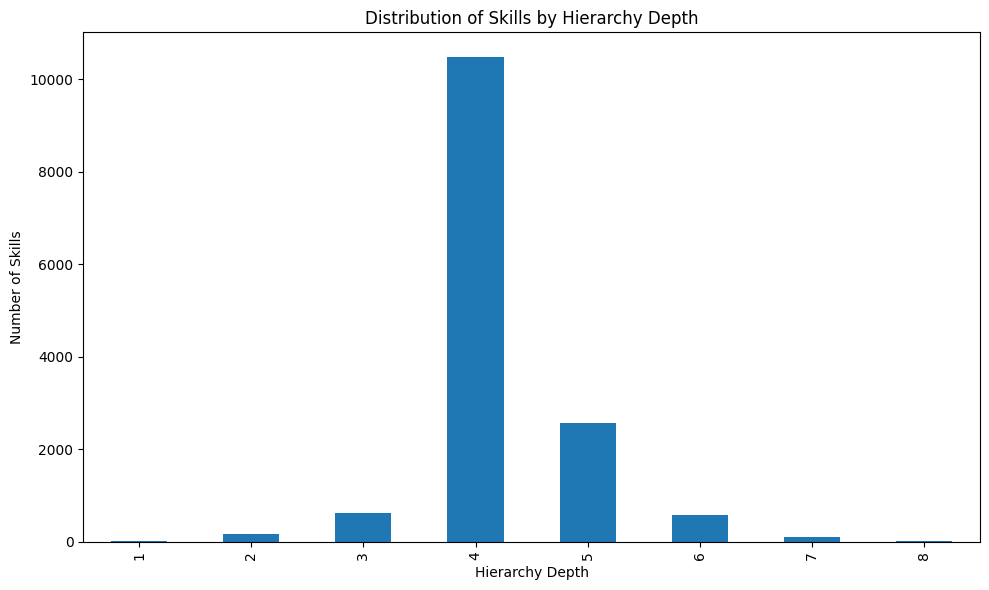

In [ ]:
# Calculate hierarchy depth for each skill
def calculate_depth(skill_uri, relations_dict, memo=None):
    """Calculate the depth of a skill in the hierarchy"""
    if memo is None:
        memo = {}
    
    if skill_uri in memo:
        return memo[skill_uri]
    
    if skill_uri not in relations_dict:
        # Root node or skill without broader concept
        memo[skill_uri] = 0
        return 0
    
    broader_uri = relations_dict[skill_uri]
    depth = 1 + calculate_depth(broader_uri, relations_dict, memo)
    memo[skill_uri] = depth
    return depth

# Create a dict mapping skill to its broader concept
relations_dict = dict(zip(broader_relations['conceptUri'], broader_relations['broaderUri']))

# Calculate depths
depths = {}
for skill_uri in broader_relations['conceptUri'].unique():
    depths[skill_uri] = calculate_depth(skill_uri, relations_dict)

# Analyze depth distribution
depth_df = pd.DataFrame.from_dict(depths, orient='index', columns=['depth'])
print("\nHierarchy Depth Distribution:")
print(depth_df['depth'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
depth_df['depth'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hierarchy Depth')
plt.ylabel('Number of Skills')
plt.title('Distribution of Skills by Hierarchy Depth')
plt.tight_layout()
plt.show()


## 7. Example: Exploring a Specific Branch of the Hierarchy


In [ ]:
# Pick one root concept and explore its hierarchy
if len(root_concepts) > 0:
    example_root = list(root_concepts)[0]
    root_name = skills_df[skills_df['conceptUri'] == example_root]['preferredLabel'].values[0]
    
    print(f"Exploring hierarchy under: {root_name}")
    print("=" * 70)
    
    # Find all descendants
    def get_children(parent_uri, relations_df):
        """Get direct children of a parent concept"""
        children = relations_df[relations_df['broaderUri'] == parent_uri]['conceptUri'].tolist()
        return children
    
    def print_hierarchy(uri, level=0, max_level=3):
        """Recursively print hierarchy"""
        if level > max_level:
            return
        
        # Get name
        name_match = skills_df[skills_df['conceptUri'] == uri]['preferredLabel']
        name = name_match.values[0] if len(name_match) > 0 else "Unknown"
        
        print("  " * level + f"- {name}")
        
        # Get children
        children = get_children(uri, broader_relations)
        for child in children[:5]:  # Limit to first 5 children to avoid too much output
            print_hierarchy(child, level + 1, max_level)
        
        if len(children) > 5:
            print("  " * (level + 1) + f"... and {len(children) - 5} more")
    
    print_hierarchy(example_root, max_level=4)


IndexError: index 0 is out of bounds for axis 0 with size 0

## 8. Relationship Between Collections and Hierarchy


In [ ]:
# Check overlap between collections
print("Checking overlap between collections:")
print("=" * 70)

collection_uris = {}
for name, df in collection_dfs.items():
    uri_col = [col for col in df.columns if 'uri' in col.lower() or 'Uri' in col][0]
    collection_uris[name] = set(df[uri_col].unique())

# Create overlap matrix
overlap_matrix = pd.DataFrame(index=collection_uris.keys(), columns=collection_uris.keys())

for name1, uris1 in collection_uris.items():
    for name2, uris2 in collection_uris.items():
        overlap = len(uris1 & uris2)
        overlap_matrix.loc[name1, name2] = overlap

print("\nOverlap Matrix (number of shared skills):")
display(overlap_matrix.astype(int))


Checking overlap between collections:

Overlap Matrix (number of shared skills):


,digital,green,language,research,transversal,digComp
digital,1284,15,0,5,7,20
green,15,591,0,0,5,1
language,0,0,359,0,0,0
research,5,0,0,40,8,0
transversal,7,5,0,8,95,1
digComp,20,1,0,0,1,25


In [ ]:
# Check which collections skills belong to
all_skills_uris = set(skills_df['conceptUri'].unique())
skills_in_any_collection = set()
for uris in collection_uris.values():
    skills_in_any_collection.update(uris)

print(f"\nTotal skills in ESCO: {len(all_skills_uris)}")
print(f"Skills in at least one collection: {len(skills_in_any_collection)}")
print(f"Skills not in any collection: {len(all_skills_uris - skills_in_any_collection)}")
print(f"Percentage in collections: {len(skills_in_any_collection) / len(all_skills_uris) * 100:.2f}%")



Total skills in ESCO: 13939
Skills in at least one collection: 2334
Skills not in any collection: 11605
Percentage in collections: 16.74%


## 9. Summary: ESCO Skills Hierarchy Structure

Let's summarize our findings about the ESCO skills hierarchy.


In [ ]:
print("=" * 70)
print("ESCO SKILLS HIERARCHY STRUCTURE - SUMMARY")
print("=" * 70)

print("\n1. MAIN COMPONENTS:")
print(f"   - Total skills: {len(skills_df)}")
print(f"   - Skill groups: {len(skill_groups)}")
print(f"   - Broader relations (parent-child links): {len(broader_relations)}")

print("\n2. COLLECTIONS (Cross-cutting themes):")
for name, size in collection_sizes.items():
    print(f"   - {name.capitalize()}: {size} skills")

print("\n3. HIERARCHY STRUCTURE:")
print(f"   - Root concepts (top-level): {len(root_concepts)}")
print(f"   - Skills with parent concepts: {len(all_skills_in_relations)}")
print(f"   - Maximum depth: {depth_df['depth'].max()}")
print(f"   - Average depth: {depth_df['depth'].mean():.2f}")

print("\n4. KEY INSIGHTS:")
print("   - ESCO uses a broader/narrower relationship model")
print("   - Collections are thematic groupings (digital, green, etc.)")
print("   - Collections can overlap (skills can belong to multiple themes)")
print("   - The hierarchy is multi-level with root concepts at the top")
print("   - Not all skills are in collections - collections are selective")


ESCO SKILLS HIERARCHY STRUCTURE - SUMMARY

1. MAIN COMPONENTS:
   - Total skills: 13939
   - Skill groups: 640
   - Broader relations (parent-child links): 20822

2. COLLECTIONS (Cross-cutting themes):
   - Digital: 1284 skills
   - Green: 591 skills
   - Language: 359 skills
   - Research: 40 skills
   - Transversal: 95 skills
   - Digcomp: 25 skills

3. HIERARCHY STRUCTURE:
   - Root concepts (top-level): 4
   - Skills with parent concepts: 14575
   - Maximum depth: 8
   - Average depth: 4.21

4. KEY INSIGHTS:
   - ESCO uses a broader/narrower relationship model
   - Collections are thematic groupings (digital, green, etc.)
   - Collections can overlap (skills can belong to multiple themes)
   - The hierarchy is multi-level with root concepts at the top
   - Not all skills are in collections - collections are selective
